# [코들 오리지널 AI] 구글 검색량 데이터 분석하기

코로나는 2019년 12월 중국 우한에서 처음 보고되어 현재는 전 세계에 퍼져있는 바이러스이다. 사람들은 정보를 찾기 위해서 구글을 사용한다. 그렇다면 코로나와 관련된 키워드의 검색량은 어떻게 달라졌을까?

1. covid.csv 파일 불러오기
2. 각 키워드의 검색량 추이를 나타내는 그래프를 그리고 출력하기 
3. 각 키워드 별 검색량의 최대값을 찾아 출력하기
4. 각 키워드의 검색량이 최대였던 날의 데이터를 모두 출력하기
5. '코로나'와 '마스크' 키워드의 검색량 추이 그래프를 비교하고 분석해보기
6. '코로나'와 '백신' 키워드의 검색량 추이 그래프를 비교하고 분석해보기
7. 자유롭게 데이터 분석해보기

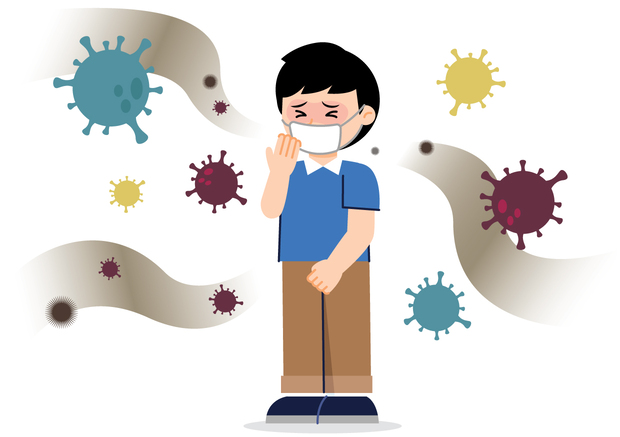

### 예제 1. 파일 불러오기
분석하고자 하는 데이터를 불러와주세요.
* `pd.read_csv`를 사용하면 파일을 데이터로 불러올 수 있어요.
* 데이터의 앞부분 5개를 살펴보아요. `df.head` 함수를 사용하면 데이터의 앞부분을 반환해줘요

In [1]:
# 예제 1 : 파일 불러오기
import pandas as pd # pandas 라이브러리를 불러옵니다. 관례적으로 pd라는 별칭을 사용합니다. 

# 참고 : "as"는 라이브러리의 이름을 임의로 설정할 수 있도록 합니다. 따라서 이렇게 호출한 경우 이후에 pandas라이브러리는 pd라는 이름으로 호출할 수 있습니다.


df = pd.read_csv('https://tmn-bucket-materials-all.s3.ap-northeast-2.amazonaws.com/data/covid.csv')  # covid.csv 파일을 불러와서 df라는 이름의 데이터 프레임에 저장해줍니다. 
df.head()  # 데이터의 앞부분을 출력해줍니다. 특별히 개수를 지정하지 않는다면, 기본적으로 5줄을 출력합니다.

# year, month, day - 해당 일자를 의미합니다
# 코로나, 마스크, 백신 - 해당 키워드의 검색량을 의미합니다.

,코로나,마스크,year,month,day,백신
0,0,3,2019,2,3,0
1,0,3,2019,2,10,0
2,0,4,2019,2,17,1
3,0,4,2019,2,24,1
4,0,12,2019,3,3,0


### 예제 2-1. 키워드 검색량 추이 그래프 그리기
'코로나', '마스크', '백신' 키워드의 검색량이 시간에 따라 어떻게 변화하는지 관찰하기 위해 그래프를 그려봅시다.  
* `plt.plot(값, label='이름')`을 사용하면 값을 그릴 수 있습니다
* `plt.legend()`를 사용하면 범례를 그릴 수 있습니다.
* `plt.show()`를 사용하면 이때까지 그린 것을 출력할 수 있습니다.

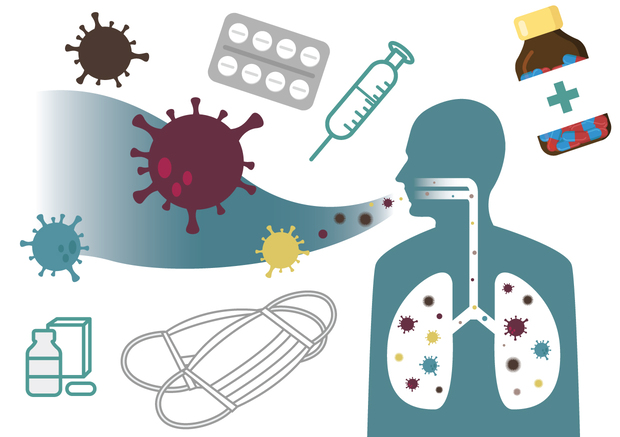

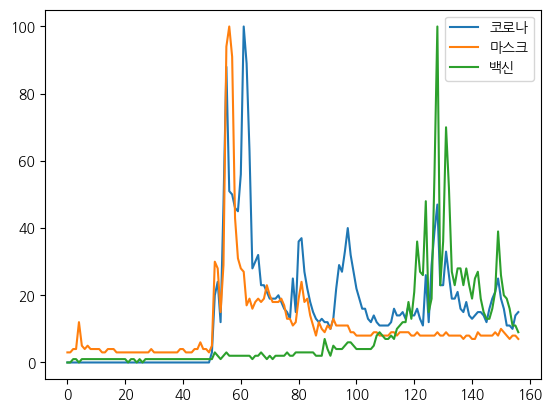

In [2]:
# 예제 2-1 : 키워드 검색량 추이 그래프 그리기
import matplotlib.pyplot as plt

plt.plot(df['코로나'], label='코로나')
plt.plot(df['마스크'], label='마스크')
plt.plot(df['백신'], label='백신')
plt.legend() # 위의 세 label들의 색을 설명하는 범례를 한쪽에 표시해줍니다. 
plt.show()

### 예제 2-2. 키워드 검색량 추이 그래프 그리기
앞서 그린 그래프에 표의 제목과 x, y축의 제목을 설정해주세요.
* `plt.title(이름)`을 사용하면 제목을 설정할 수 있습니다
* `plt.xlabel(이름)`을 사용하면 x축의 이름을 지어줄 수 있습니다.
* `plt.ylabel(이름)`을 사용하면 y축의 이름을 지어줄 수 있습니다.

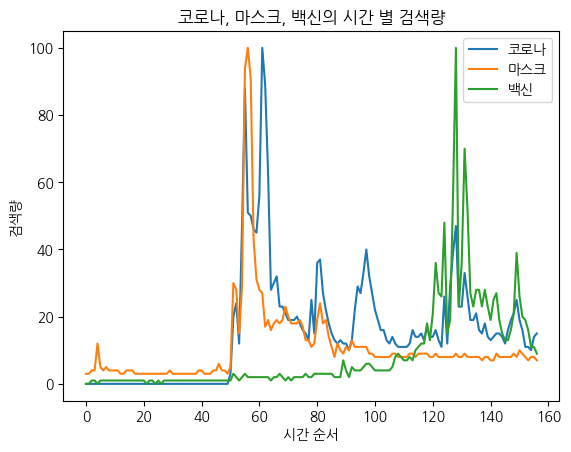

In [3]:
# 예제 2-2 : 키워드 검색량 추이 그래프 그리기
plt.plot(df['코로나'], label='코로나')
plt.plot(df['마스크'], label='마스크')
plt.plot(df['백신'], label='백신')
plt.legend()

plt.title('코로나, 마스크, 백신의 시간 별 검색량') # 그래프의 제목
plt.xlabel('시간 순서') # x축 이름
plt.ylabel('검색량') # y축 이름
plt.show()  # 이 명령어가 나오기 전까지 그린 그래프를 출력하는 함수입니다. 따라서 그래프 그리기의 가장 마지막 단계에 위치하도록 해주어야 합니다. 

### 예제 3. 키워드 별 검색량 최대값 출력하기
키워드 별로 검색량의 최대값을 찾아 출력해주세요.
* `df[<column 이름>]`을 사용하면 데이터에서 그 이름을 가지는 열을 가져올 수 있어요. (딕셔너리에서 값을 불러오는 방식과 유사하죠?)
* 가져온 열에서 `max` 함수를 호출하면 그 열의 최대값을 가져올 수 있어요.

In [4]:
# 예제 3 : 키워드 별 검색량 최대값 출력하기
corona_max = df['코로나'].max() # label이 '코로나'인 그래프의 최대값을 변수 corona_max에 저장해줍니다.  
mask_max = df['마스크'].max()
vaccine_max = df['백신'].max()
print(corona_max, mask_max, vaccine_max)

100 100 100


### 예제 4. 검색량이 최대였던 날의 모든 데이터 출력하기
* `df[df[<column 이름>] == 값]`을 사용하면 그 열이 해당 값인 모든 행을 가져올 수 있어요.

In [5]:
# 예제 4 : 검색량이 최대였던 날의 모든 데이터 출력하기

print(df[df['코로나'] == corona_max]) # '코로나' 검색량이 max인 행의 모든 값을 출력합니다. 즉 2020년 4월 5일 각 키워드의 검색량 모두를 출력해줄 것입니다.
print(df[df['마스크'] == mask_max]) # 2020년 3월 1일
print(df[df['백신'] == vaccine_max]) # 2021년 7월 18일

    코로나  마스크  year  month  day  백신
61  100   27  2020      4    5   2
    코로나  마스크  year  month  day  백신
56   51  100  2020      3    1   2
     코로나  마스크  year  month  day   백신
128   47    9  2021      7   18  100


### 예제 5. '코로나', '마스크' 그래프 비교.분석하기
코로나와 마스크의 추이가 비슷한 이유를 추론해보고, 그에 알맞은 사건을 하나 제시해보자. 

- 예시 답안
    - 추론한 이유 : 코로나가 퍼짐과 동시에 마스크의 수요가 증가했기 때문에 코로나와 마스크의 검색량 추이가 비슷할 것이다.  
    - 알맞은 사건 예시 : 코로나와 동시에 발생한 마스크 대란

### 예제 6. '코로나', '백신' 그래프 비교.분석하기
코로나와 백신의 추이가 다른 이유를 추론해보고, 그에 알맞은 사건을 하나 제시하세요.

- 예시 답안
    - 추론한 이유 : 코로나가 먼저 퍼지며 검색량이 증가한 이후 백신에 대한 소식이 들려오며 백신 관련 검색량이 점차 증가했을 것이다.
    - 알맞는 사건 예시 : 코로나가 많이 확산된 이후 백신 개발 관련 뉴스가 활발해짐


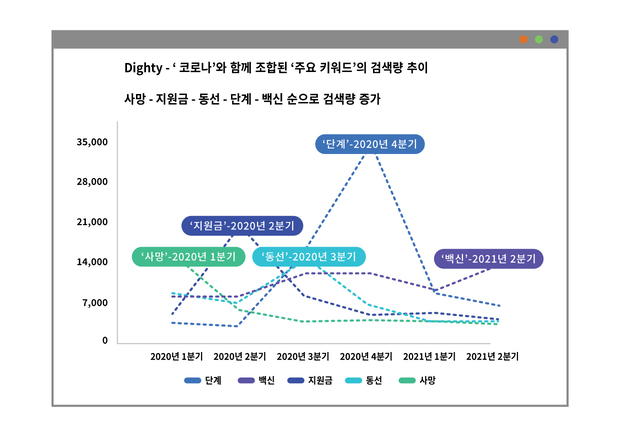

### 예제 7. 자유롭게 데이터 분석해보기
추가적으로 분석할 것이 있으면 자유롭게 분석해 주세요.

- 예시 답안
    - 코로나 검색량은 마스크 검색량에 비해 피크가 많다. 코로나 사태 초반에는 마스크가 수요 대비 공급량이 적어, 마스크를 구매하는 것에 많은 관심이 쏠렸고, 이는 마스크 키워드 검색량의 증가로 이어졌다.
    - 그러나 이후 마스크 공급이 안정화되며 마스크 구매에 대한 관심이 줄어들어 검색량이 급격히 증가하는 일은 생기지 않은 것으로 보인다. 
    - 한편 코로나의 경우 확진자 수의 증감에 따라 네티즌들의 관심도가 증감했기 때문에, 검색량이 급격히 증가하는 현상이 자주 일어난 것으로 판단한다.  